<a href="https://colab.research.google.com/github/brendanpshea/computing_concepts_python/blob/main/IntroCS_Part3_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 3 Review: Databases, Data Structures, AI

## What is a relational database?

A **relational database** is a type of database that organizes data into tables, with each table consisting of rows (also known as records or tuples) and columns (also known as fields or attributes). The tables are related to each other through **primary keys** and **foreign keys**, which establish relationships between the tables and allow for efficient data retrieval and manipulation.

In a relational database, each table represents a specific entity or concept, and each row within a table represents a unique instance of that entity. The columns define the attributes or properties of the entity. The relationships between tables are established based on the **logical connections** between the entities they represent.

**Relational databases** are based on the **relational model**, which was introduced by Edgar F. Codd in 1970. The relational model provides a mathematical foundation for organizing and manipulating data in a structured manner. It defines concepts such as **data integrity**, **normalization**, and **relational algebra**, which are essential for maintaining data consistency and performing complex queries.

### Example

Let's consider a relational database for a library system. The database might have tables such as "Books," "Authors," and "Borrowers." The "Books" table could have columns like "BookID" (primary key), "Title," "AuthorID" (foreign key referencing the "Authors" table), and "PublicationYear." The "Authors" table could have columns like "AuthorID" (primary key) and "AuthorName." The "Borrowers" table could have columns like "BorrowerID" (primary key), "BorrowerName," and "BookID" (foreign key referencing the "Books" table).

In this example, the relationships between the tables are established through the foreign keys. The "AuthorID" in the "Books" table relates each book to its corresponding author in the "Authors" table, while the "BookID" in the "Borrowers" table relates each borrowed book to its corresponding book in the "Books" table. This allows for efficient querying and retrieval of data, such as finding all books written by a specific author or identifying the borrowers of a particular book.

#### Books Table:

| BookID | Title | AuthorID | PublicationYear |
| --- | --- | --- | --- |
| 1 | Ulysses | 1 | 1922 |
| 2 | Dubliners | 1 | 1914 |
| 3 | The Importance of Being Earnest | 2 | 1895 |
| 4 | The Picture of Dorian Gray | 2 | 1890 |
| 5 | The Playboy of the Western World | 3 | 1907 |

#### Authors Table:

| AuthorID | AuthorName |
| --- | --- |
| 1 | James Joyce |
| 2 | Oscar Wilde |
| 3 | John Millington Synge |

#### Borrowers Table:

| BorrowerID | BorrowerName | BookID |
| --- | --- | --- |
| 1 | John Smith | 1 |
| 2 | Emma Johnson | 2 |
| 3 | Michael Brown | 1 |
| 4 | Sarah Davis | 3 |
| 5 | David Wilson | 4 |

In this example:

-   The "Books" table contains information about each book, including its unique identifier (BookID), title, author (referenced by AuthorID), and publication year.
-   The "Authors" table stores the details of each author, with their unique identifier (AuthorID) and name.
-   The "Borrowers" table keeps track of who has borrowed which book, using the BorrowerID and BookID as foreign keys to establish the relationship between borrowers and books.

The relationships between the tables are as follows:

-   The "AuthorID" in the "Books" table is a foreign key referencing the "AuthorID" in the "Authors" table, establishing the relationship between books and their authors.
-   The "BookID" in the "Borrowers" table is a foreign key referencing the "BookID" in the "Books" table, establishing the relationship between borrowed books and their corresponding book records.

These tables and their relationships allow for efficient querying and data retrieval, such as finding all books written by a specific author or identifying the borrowers of a particular book.

In [ ]:
%load_ext sql
%sql sqlite://

In [ ]:
%%sql
-- Load SQL extension and establish a connection to an SQLite memory-based database

-- Creating the Authors table
CREATE TABLE Authors (
    AuthorID INTEGER PRIMARY KEY,
    AuthorName TEXT NOT NULL
);

-- Inserting data into the Authors table
INSERT INTO Authors (AuthorID, AuthorName) VALUES
    (1, 'James Joyce'),
    (2, 'Oscar Wilde'),
    (3, 'John Millington Synge');

-- Creating the Books table
CREATE TABLE Books (
    BookID INTEGER PRIMARY KEY,
    Title TEXT NOT NULL,
    AuthorID INTEGER,
    PublicationYear INTEGER,
    FOREIGN KEY (AuthorID) REFERENCES Authors(AuthorID)
);

-- Inserting data into the Books table
INSERT INTO Books (BookID, Title, AuthorID, PublicationYear) VALUES
    (1, 'Ulysses', 1, 1922),
    (2, 'Dubliners', 1, 1914),
    (3, 'The Importance of Being Earnest', 2, 1895),
    (4, 'The Picture of Dorian Gray', 2, 1890),
    (5, 'The Playboy of the Western World', 3, 1907);

-- Creating the Borrowers table
CREATE TABLE Borrowers (
    BorrowerID INTEGER PRIMARY KEY,
    BorrowerName TEXT NOT NULL,
    BookID INTEGER,
    FOREIGN KEY (BookID) REFERENCES Books(BookID)
);

-- Inserting data into the Borrowers table
INSERT INTO Borrowers (BorrowerID, BorrowerName, BookID) VALUES
    (1, 'John Smith', 1),
    (2, 'Emma Johnson', 2),
    (3, 'Michael Brown', 1),
    (4, 'Sarah Davis', 3),
    (5, 'David Wilson', 4);


 * sqlite://
Done.
3 rows affected.
Done.
5 rows affected.
Done.
5 rows affected.


[]

## How do I use SQL to query databases?

**SQL (Structured Query Language)** is a standard language used to interact with relational databases. It allows you to retrieve, manipulate, and manage data stored in the database tables. SQL provides various commands and clauses to perform different types of queries and operations on the database.

Here are some commonly used SQL commands:

-   **SELECT**: Retrieves data from one or more tables based on specified conditions.
-   **INSERT**: Inserts new records into a table.
-   **UPDATE**: Modifies existing records in a table.
-   **DELETE**: Removes records from a table based on specified conditions.
-   **JOIN**: Combines rows from two or more tables based on a related column between them.
-   **WHERE**: Filters the result set based on specified conditions.
-   **ORDER BY**: Sorts the result set in ascending or descending order based on one or more columns.
-   **GROUP BY**: Groups the result set based on one or more columns.
-   **HAVING**: Filters the grouped result set based on specified conditions.
-   **LIMIT/OFFSET**: Restricts the number of rows returned by a query and allows for pagination.

### Example

Using the library database from the previous example, let's look at 10 sample SQL queries:

| Query | Explanation |
| --- | --- |
| SELECT * FROM Books; | Retrieve all columns and rows from the "Books" table. |
| SELECT Title, PublicationYear FROM Books; | Retrieve only the "Title" and "PublicationYear" columns from the "Books" table. |
| SELECT * FROM Books WHERE AuthorID = 1; | Retrieve all books written by the author with AuthorID 1. |
| SELECT * FROM Books ORDER BY PublicationYear DESC; | Retrieve all books and sort them in descending order based on the "PublicationYear" column. |
| SELECT * FROM Books JOIN Authors ON Books.AuthorID = Authors.AuthorID; | Retrieve all books along with their corresponding author information by joining the "Books" and "Authors" tables based on the "AuthorID" column. |
| SELECT Authors.AuthorName, COUNT(*) as BookCount FROM Authors JOIN Books ON Authors.AuthorID = Books.AuthorID GROUP BY Authors.AuthorID; | Retrieve the count of books written by each author by joining the "Authors" and "Books" tables and grouping the results by "AuthorID". |
| SELECT * FROM Borrowers WHERE BookID = 1; | Retrieve all borrowers who have borrowed the book with BookID 1. |
| INSERT INTO Books (Title, AuthorID, PublicationYear) VALUES ('The Dead', 1, 1914); | Insert a new book record into the "Books" table with the specified values. |
| UPDATE Books SET PublicationYear = 1915 WHERE BookID = 6; | Update the "PublicationYear" of the book with BookID 6 to 1915. |
| DELETE FROM Borrowers WHERE BorrowerID = 3; | Delete the borrower record with BorrowerID 3 from the "Borrowers" table. |

These are just a few examples of how SQL can be used to query and manipulate data in a relational database. SQL provides many more commands and clauses to perform complex queries, data aggregation, and database management tasks.

### What is a Python Dictionary?

A **Python dictionary** is a built-in data structure that allows you to store and retrieve data in a key-value format. It is an unordered collection of **key-value pairs**, where each key is unique and associated with a specific value. Dictionaries are also known as **associative arrays**, **hash tables**, or **hash maps** in other programming languages.

In a dictionary, the **keys** are used to index and access the corresponding **values**. Keys must be immutable objects like strings, numbers, or tuples, while values can be of any data type, including lists, dictionaries, or even functions. The key-value pairs are enclosed in curly braces `{}`, and each pair is separated by a comma.

Here's the general syntax for creating a dictionary:

```python
dictionary_name = {key1: value1, key2: value2, ..., keyN: valueN}
```

You can access the value associated with a specific key using square brackets `[]` or the `get()` method. You can also modify, add, or remove key-value pairs using various dictionary methods and operations.

### Example

Let's create a dictionary to store information about famous paintings and their artists:

In [ ]:
paintings = {
    "Mona Lisa": "Leonardo da Vinci",
    "The Starry Night": "Vincent van Gogh",
    "The Persistence of Memory": "Salvador Dali",
    "The Scream": "Edvard Munch",
    "Girl with a Pearl Earring": "Johannes Vermeer"
}

Now, let's take a look at some common operations.

In [ ]:
# Create a dictionary to store information about famous paintings and their artists
paintings = {
    "Mona Lisa": "Leonardo da Vinci",
    "The Starry Night": "Vincent van Gogh",
    "The Persistence of Memory": "Salvador Dali",
    "The Scream": "Edvard Munch",
    "Girl with a Pearl Earring": "Johannes Vermeer"
}

# Accessing values
print("Accessing values:")
print(paintings["Mona Lisa"])  # Output: Leonardo da Vinci
print(paintings.get("The Starry Night"))  # Output: Vincent van Gogh
print()

# Modifying values
print("Modifying values:")
paintings["The Scream"] = "Edvard Munch (Norwegian)"
print(paintings["The Scream"])  # Output: Edvard Munch (Norwegian)
print()

# Adding new key-value pairs
print("Adding new key-value pairs:")
paintings["The Birth of Venus"] = "Sandro Botticelli"
print(paintings["The Birth of Venus"])  # Output: Sandro Botticelli
print()

# Removing key-value pairs
print("Removing key-value pairs:")
del paintings["The Persistence of Memory"]
print("The Persistence of Memory" in paintings)  # Output: False
print()

# Checking if a key exists
print("Checking if a key exists:")
if "Girl with a Pearl Earring" in paintings:
    print("The painting 'Girl with a Pearl Earring' exists in the dictionary.")
print()

# Iterating over a dictionary
print("Iterating over a dictionary:")
for painting, artist in paintings.items():
    print(f"{painting} is painted by {artist}.")

Accessing values:
Leonardo da Vinci
Vincent van Gogh

Modifying values:
Edvard Munch (Norwegian)

Adding new key-value pairs:
Sandro Botticelli

Removing key-value pairs:
False

Checking if a key exists:
The painting 'Girl with a Pearl Earring' exists in the dictionary.

Iterating over a dictionary:
Mona Lisa is painted by Leonardo da Vinci.
The Starry Night is painted by Vincent van Gogh.
The Scream is painted by Edvard Munch (Norwegian).
Girl with a Pearl Earring is painted by Johannes Vermeer.
The Birth of Venus is painted by Sandro Botticelli.


## What is Object-Oriented Programming? How does it work in Python?

**Object-Oriented Programming (OOP)** is a programming paradigm that organizes code into objects, which are instances of classes. It focuses on creating reusable and modular code by encapsulating data and behavior into objects. OOP promotes concepts such as encapsulation, inheritance, and polymorphism, which help in writing more maintainable and scalable code.

In Python, everything is an object, and classes are used to define the structure and behavior of objects. A **class** is a blueprint or template that defines the attributes (data) and methods (functions) that an object of that class will have. Objects are created from classes and can interact with each other through their methods.

Here are the key concepts of OOP in Python:

1.  **Class**: A class is a blueprint for creating objects. It defines the attributes and methods that the objects of the class will possess.
2.  **Object**: An object is an instance of a class. It is created from a class and has its own unique set of attributes and can perform actions defined by the class methods.
3.  **Encapsulation**: Encapsulation is the process of bundling data and methods into a single unit (object) and restricting direct access to the internal state of the object from outside the class. It provides data protection and promotes modularity.
4.  **Inheritance**: Inheritance allows a class to inherit attributes and methods from another class. It promotes code reuse and helps in creating specialized classes based on existing ones.
5.  **Polymorphism**: Polymorphism allows objects of different classes to be treated as objects of a common class. It enables writing more flexible and generic code that can work with objects of different types.

### Example

Let's create a simple class hierarchy to represent albums by Minnesota musicians:

In [ ]:
class Album:
    def __init__(self, title, artist, year):
        # Constructor method (__init__) initializes an object's attributes
        self.title = title  # Assigning the title attribute
        self.artist = artist  # Assigning the artist attribute
        self.year = year  # Assigning the year attribute

    def get_info(self):
        # Method to retrieve information about the album
        return f"{self.title} by {self.artist} ({self.year})"

class StudioAlbum(Album):
    def __init__(self, title, artist, year, studio):
        # Subclass StudioAlbum inherits from superclass Album
        super().__init__(title, artist, year)  # Call superclass's constructor
        self.studio = studio  # Assigning the studio attribute

    def get_info(self):
        # Method to retrieve information about the studio album
        return f"{super().get_info()} - Recorded at {self.studio}"

class LiveAlbum(Album):
    def __init__(self, title, artist, year, venue):
        # Subclass LiveAlbum inherits from superclass Album
        super().__init__(title, artist, year)  # Call superclass's constructor
        self.venue = venue  # Assigning the venue attribute

    def get_info(self):
        # Method to retrieve information about the live album
        return f"{super().get_info()} - Recorded live at {self.venue}"


In this example, we have a base class called `Album` that represents a generic album with attributes like `title`, `artist`, and `year`. It also has a method `get_info()` that returns a string with the album information.

We then have two derived classes, `StudioAlbum` and `LiveAlbum`, which inherit from the `Album` class. They add specific attributes and override the `get_info()` method to provide additional information specific to studio albums and live albums, respectively.

Here's how we can create objects from these classes and use them:

In [ ]:
# Creating objects of the classes
album1 = Album("Blonde on Blonde", "Bob Dylan", 1966)
album2 = StudioAlbum("Purple Rain", "Prince", 1984, "First Avenue")
album3 = LiveAlbum("The Bootleg Series Vol. 4: Bob Dylan Live 1966", "Bob Dylan", 1998, "Manchester Free Trade Hall")

# Accessing object attributes and methods
print(album1.get_info())
print(album2.get_info())
print(album3.get_info())

Blonde on Blonde by Bob Dylan (1966)
Purple Rain by Prince (1984) - Recorded at First Avenue
The Bootleg Series Vol. 4: Bob Dylan Live 1966 by Bob Dylan (1998) - Recorded live at Manchester Free Trade Hall


## Basic Principles of Software Engineering

Software engineering is the process of designing, developing, testing, and maintaining software systems. It involves applying engineering principles and methodologies to create efficient, reliable, and maintainable software solutions. Two common approaches to software design are the Waterfall model and Agile development.

### Waterfall Model

The **Waterfall model** is a linear and sequential approach to software development. It consists of distinct phases that are completed one after another, with each phase depending on the deliverables of the previous phase. The phases typically include:

1.  Requirements gathering and analysis
2.  Design
3.  Implementation
4.  Testing
5.  Deployment
6.  Maintenance

The Waterfall model emphasizes thorough planning and documentation upfront. It works well for projects with clear and stable requirements, but it can be less flexible when changes are needed during the development process.

### Agile Development

**Agile development** is an iterative and incremental approach to software development. It focuses on delivering working software quickly and adapting to changing requirements. Agile methodologies, such as Scrum and Kanban, promote collaboration, flexibility, and continuous improvement.

In Agile development, the project is divided into small, manageable iterations called sprints. Each sprint typically lasts 1-4 weeks and aims to deliver a potentially shippable product increment. The team works closely with stakeholders and incorporates feedback regularly to ensure the software meets the evolving needs of the users.

### Unit Testing

**Unit testing** is a software testing technique where individual units or components of the software are tested in isolation to ensure they function correctly. A unit can be a function, method, class, or module. The goal of unit testing is to validate that each unit performs as expected and handles edge cases appropriately.

Unit tests are written by developers and are usually automated. They help catch bugs early in the development process, provide confidence in the correctness of the code, and serve as documentation for the expected behavior of the units. Unit testing frameworks, such as Python's `unittest` or JavaScript's Jest, are commonly used to write and run unit tests.

### Building Large Software Projects

The concepts we've discussed earlier, such as databases, dictionaries, and objects, play crucial roles in constructing large software projects:

-   **Databases**: Databases, particularly relational databases, are essential for storing and managing large amounts of structured data. They provide efficient data retrieval, ensure data integrity, and support concurrent access by multiple users. Databases are used in various applications, from e-commerce websites to enterprise systems.
-   **Dictionaries**: Dictionaries, or hash tables, are useful data structures for fast data lookup and retrieval based on keys. They are commonly used for caching, indexing, and implementing associative arrays. In large software projects, dictionaries can optimize performance by providing constant-time access to frequently used data.
-   **Objects**: Object-oriented programming (OOP) is a fundamental paradigm in software engineering. It allows developers to model real-world entities as objects, encapsulating data and behavior. OOP promotes code reusability, modularity, and maintainability. In large projects, objects help organize code into logical units, making it easier to understand, test, and extend the system.

By leveraging these concepts and following software engineering principles, developers can build robust, scalable, and maintainable software systems. Techniques like modular design, version control, continuous integration, and automated testing are also crucial for managing the complexity of large projects and ensuring the quality of the software.

Effective software engineering requires a combination of technical skills, problem-solving abilities, and collaboration among team members. It involves understanding the requirements, designing appropriate solutions, writing clean and efficient code, and continuously testing and refining the software to meet the needs of the users.

History and Concepts of Symbolic AI/GOFAI
-----------------------------------------

Symbolic AI, also known as Good Old-Fashioned Artificial Intelligence (GOFAI), is an approach to artificial intelligence that focuses on using explicit representations of knowledge and formal logic to solve problems. It was the dominant paradigm in AI research from the 1950s to the 1980s.

### Formal Logic

**Formal logic** is a fundamental concept in Symbolic AI. It involves representing knowledge and reasoning using precise mathematical formulas and rules. The two main types of formal logic used in Symbolic AI are:

1.  **Propositional Logic**: Propositional logic deals with statements that can be either true or false. It uses logical connectives like "and" (∧), "or" (∨), "not" (¬), "implies" (→), and "if and only if" (↔) to combine and manipulate propositions.
2.  **First-Order Logic (FOL)**: FOL extends propositional logic by introducing predicates, variables, and quantifiers. It allows for more expressive representations of knowledge and can handle relationships between objects. FOL uses symbols like "for all" (∀) and "there exists" (∃) to quantify over variables.

Formal logic provides a structured way to represent and reason about knowledge in Symbolic AI systems. It allows for logical deduction, inference, and theorem proving.

### Regular Expressions

**Regular expressions** (regex) are a powerful tool for pattern matching and string manipulation. They are widely used in Symbolic AI for tasks like natural language processing, text parsing, and information extraction.

Regular expressions define a search pattern that can match specific sequences of characters within a string. They use special characters and metacharacters to define the pattern. For example:

-   `^` matches the start of a string
-   `$` matches the end of a string
-   `*` matches zero or more occurrences of the preceding character
-   `+` matches one or more occurrences of the preceding character
-   `?` matches zero or one occurrence of the preceding character
-   `[]` defines a character set
-   `|` represents an OR condition

### Example: C-3PO Chatbot

Let's create a simple chatbot based on C-3PO from Star Wars using regular expressions in Python. The chatbot will respond to specific patterns in user input.

In [ ]:
import re  # Import the regex module, which allows for pattern matching in strings

def chatbot_response(user_input):
    # This function returns a response from a chatbot based on user input.

    # Check if the user's message contains the word "hello" (case insensitive)
    if re.search(r'\bhello\b', user_input, re.IGNORECASE):
        # Respond to greeting
        return "Hello! I am C-3PO, human-cyborg relations."

    # Check if the user's message contains the word "name" (case insensitive)
    elif re.search(r'\bname\b', user_input, re.IGNORECASE):
        # Provide the chatbot's name and its capabilities
        return "My name is C-3PO, a protocol droid fluent in over six million forms of communication."

    # Check if the user's message contains the word "master" (case insensitive)
    elif re.search(r'\bmaster\b', user_input, re.IGNORECASE):
        # Mention the chatbot's master
        return "My master is Luke Skywalker, a brave Jedi Knight."

    # Check if the user's message contains the word "protocol" (case insensitive)
    elif re.search(r'\bprotocol\b', user_input, re.IGNORECASE):
        # Explain the function of a protocol droid
        return "As a protocol droid, I am well-versed in etiquette, customs, and translation."

    # Check if the user's message contains the word "goodbye" (case insensitive)
    elif re.search(r'\bgoodbye\b', user_input, re.IGNORECASE):
        # Provide a farewell message
        return "Goodbye! May the Force be with you."

    # Default response if no recognized keywords are found
    else:
        return "I apologize, but I am not quite sure how to respond to that."

# Initial greeting before entering the loop
print("C-3PO: Greetings, human! How may I assist you today?")

# Example usage
while True:
    user_input = input("User: ")  # Prompt the user to type something
    response = chatbot_response(user_input)  # Generate a response from the chatbot
    print("C-3PO:", response)  # Output the chatbot's response

    # Check if the conversation should end
    if re.search(r'\bgoodbye\b', user_input, re.IGNORECASE):
        break  # Exit the loop if the user says "goodbye"


C-3PO: Greetings, human! How may I assist you today?
User: goodbye
C-3PO: Goodbye! May the Force be with you.


In this example, the `chatbot_response()` function uses regular expressions to match specific patterns in the user input and provides appropriate responses. The regular expressions are case-insensitive and use word boundaries (`\b`) to ensure precise matching.

The chatbot responds to greetings, questions about its name and master, mentions of protocol, and farewell messages. If the user input doesn't match any defined patterns, a default response is provided.

The chatbot is run in a loop, allowing the user to interact with it until a goodbye message is entered.

Symbolic AI and formal logic laid the foundation for early AI systems and continue to influence research in areas like knowledge representation, reasoning, and natural language processing. Regular expressions, while not exclusively tied to Symbolic AI, are a useful tool for pattern matching and text processing in AI applications.

## Statistical Machine Learning
While Symbolic AI and formal logic were the dominant approaches in the early days of AI, they faced challenges in dealing with uncertain and noisy real-world data. This led to the emergence of **statistical machine learning**, which focuses on building systems that can learn and make predictions based on data.

Statistical machine learning combines principles from statistics, probability theory, and computer science to create algorithms that can automatically learn patterns and relationships from data. Instead of relying on explicitly programmed rules, these algorithms learn from examples and improve their performance over time.

### Bayes' Theorem

**Bayes' theorem** is a fundamental concept in probability theory and forms the basis for many machine learning algorithms. It describes how to update the probability of a hypothesis (H) given some observed evidence (E). Mathematically, Bayes' theorem is expressed as:

P(H|E) = (P(E|H) * P(H)) / P(E)

Where:

-   P(H|E) is the probability of the hypothesis given the evidence (posterior probability)
-   P(E|H) is the probability of the evidence given the hypothesis (likelihood)
-   P(H) is the prior probability of the hypothesis
-   P(E) is the probability of the evidence

Bayes' theorem allows us to incorporate prior knowledge and update our beliefs based on new evidence. It is widely used in machine learning for tasks like classification, spam filtering, and medical diagnosis.

### Example: Medical Diagnosis using Bayes' Theorem

Let's implement a Python function that calculates the probability of a disease given the presence of a symptom using Bayes' theorem:

In [ ]:
def bayes_theorem(pr_h, pr_e_h, pr_e_not_h):
    pr_not_h = 1 - pr_h
    pr_e = pr_e_h * pr_h + pr_e_not_h * pr_not_h
    pr_h_e = (pr_e_h * pr_h) / pr_e
    return pr_h_e

# Example usage
pr_disease = 0.01
pr_symptom_given_disease = 0.9
pr_symptom_given_no_disease = 0.05

pr_disease_given_symptom = bayes_theorem(pr_disease, pr_symptom_given_disease, pr_symptom_given_no_disease)
print(f"Probability of having the disease given the symptom: {pr_disease_given_symptom:.3f}")

Probability of having the disease given the symptom: 0.154


In this example, the `bayes_theorem` function takes the prior probability of the hypothesis (`pr_h`), the probability of the evidence given the hypothesis (`pr_e_h`), and the probability of the evidence given the absence of the hypothesis (`pr_e_not_h`). It calculates the posterior probability using Bayes' theorem and returns the result.

### Decision Trees

**Decision trees** are another popular machine learning algorithm used for both classification and regression tasks. They are tree-like structures where each internal node represents a feature or attribute, each branch represents a decision rule, and each leaf node represents an outcome or prediction.

Decision trees learn from labeled training data by recursively splitting the data based on the most informative features. The goal is to create a tree that can make accurate predictions on new, unseen data.

### Example: Titantic Survival using Decision Trees

Let's use the scikit-learn library in Python to build a decision tree for "who survived on the Titanic":

Accuracy of the decision tree: 0.790


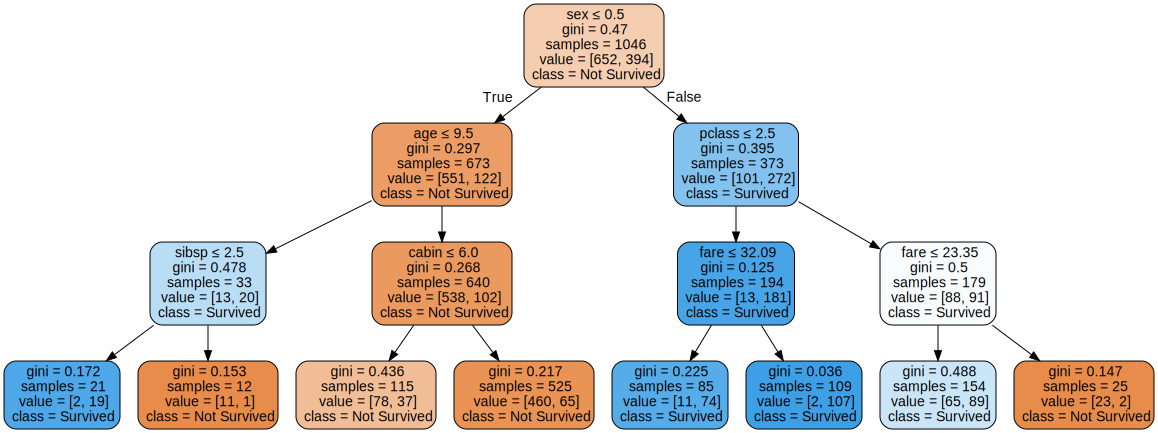

In [7]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image
import graphviz
import pydotplus
import pandas as pd

# Load the Titanic dataset from pydataset
data = fetch_openml(name='titanic', version=1, as_frame=True, parser='auto')
X, y = data.data, data.target

# Preprocess the dataset
def preprocess_data(X):
    X.loc[:, 'sex'] = X['sex'].map({'male': 0, 'female': 1})
    X.loc[:, 'embarked'] = X['embarked'].fillna('S')
    X.loc[:, 'embarked'] = X['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    X.loc[:, 'age'] = X['age'].fillna(X['age'].median())
    X.loc[:, 'cabin'] = X['cabin'].fillna('Unknown')
    X.loc[:, 'cabin'] = X['cabin'].apply(lambda x: x[0])
    X = X.drop(['name', 'ticket', 'boat', 'body', 'home.dest'], axis=1)
    return X

X = preprocess_data(X)

# Convert categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()
X['cabin'] = label_encoder.fit_transform(X['cabin'])

# Check for missing values and remove rows with NaN
missing_rows = X.isnull().any(axis=1)
X = X[~missing_rows]
y = y[~missing_rows]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=3)

# Train the decision tree
clf.fit(X_train, y_train)

# Make predictions on the test set
predictions = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the decision tree: {accuracy:.3f}")

# Visualize the decision tree
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['Not Survived', 'Survived'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a GraphViz object from the dot data
graph = graphviz.Source(dot_data)

# Display the graph
graph

This graph reveals the following things, among others:

1. The single most important features for determining whether someone survived was sex (men died at a higher rate than women). Most men died, while most women survived.
2. Among men, age was the most important factor in determining whether they survived (boys under 10  were the only subgroup of men likely to survive). Poor, adult men were exceptionally unlikely to survive.
3. Among women, first- and second-class passengers (who were generally wealthier) survived at higher-rate than others.
4. The only group of women NOT likely to survive were those in the absolute cheapest/worst cabins.

Here's what happens here:

1.  Data Loading and Preprocessing:
    -   The first step is to load the dataset, which in this case is the Titanic dataset from the OpenML repository using `fetch_openml()`. The dataset contains information about passengers on the Titanic, including features like age, sex, passenger class, and whether they survived or not.
    -   Data preprocessing is a crucial step in machine learning. It involves cleaning, transforming, and preparing the data for the learning algorithm. In this code, the `preprocess_data()` function is used to handle missing values, convert categorical variables to numerical ones, and drop unnecessary columns.
    -   Categorical variables, such as 'sex' and 'embarked', are mapped to numerical values using a dictionary or label encoding. This is necessary because most machine learning algorithms require numerical input.
    -   Missing values are handled by filling them with appropriate values, such as the median for numerical features like 'age' and a default value for categorical features like 'cabin'.
2.  Train-Test Split:
    -   Before training the model, it's important to split the dataset into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance on unseen data.
    -   The `train_test_split()` function from scikit-learn is used to randomly split the preprocessed data into training and testing sets. In this example, 20% of the data is allocated for testing (`test_size=0.2`), and the rest is used for training.
3.  Model Training:
    -   A decision tree classifier is created using the `DecisionTreeClassifier` class from scikit-learn. The `max_depth` parameter is set to 3, which limits the depth of the tree to prevent overfitting.
    -   The `fit()` method is called on the classifier object, passing the training features (`X_train`) and labels (`y_train`). During training, the decision tree algorithm learns the patterns and relationships in the data by recursively splitting the features based on certain criteria to create a tree-like structure.
    -   The algorithm selects the best feature and threshold at each node to maximize the information gain or minimize the impurity measure (e.g., Gini impurity or entropy).
4.  Model Evaluation:
    -   Once the model is trained, it's important to evaluate its performance on unseen data. The `predict()` method is used to make predictions on the testing features (`X_test`).
    -   The predicted labels are compared with the actual labels (`y_test`) to calculate the accuracy of the model using the `accuracy_score()` function. Accuracy is the proportion of correctly predicted instances out of the total instances.
    -   In this example, the accuracy of the decision tree classifier is printed, giving an indication of how well the model performs on the testing set.
5.  Visualization:
    -   Visualizing the decision tree can provide insights into how the model makes predictions based on the input features.
    -   The `export_graphviz()` function is used to generate a graphviz representation of the decision tree. It includes information about the features, thresholds, and class distributions at each node.
    -   The resulting graph is then rendered using the `pydotplus` library and displayed using the `Image()` function from IPython.
    -   Visualizing the decision tree helps in understanding the decision-making process of the model and identifying the most important features.

In summary, statistical machine learning involves training models on historical data to make predictions or decisions on new, unseen data. Decision trees are a popular algorithm for both classification and regression tasks. They work by recursively splitting the data based on features to create a tree-like structure. The model is trained on a portion of the data and evaluated on held-out testing data to assess its performance. Data preprocessing, train-test splitting, model training, evaluation, and visualization are key steps in the machine learning workflow.

## Perceptrons: Training and Deployment


Perceptrons are the simplest type of artificial neural networks and form the building blocks for more complex neural network architectures. They are used for binary classification tasks and can learn to make decisions based on input features.

### Components of a Perceptron

A perceptron consists of the following components:

1.  **Input Features**: The input features are the variables or attributes that the perceptron uses to make predictions. Each input feature is associated with a weight that determines its importance.
2.  **Weights**: Weights are the learnable parameters of a perceptron. They represent the strength of the connection between each input feature and the perceptron's output. The weights are adjusted during training to minimize the prediction error.
3.  **Bias**: The bias is an additional learnable parameter that allows the perceptron to shift the decision boundary. It acts as an offset and helps the perceptron learn more flexible decision boundaries.
4.  **Activation Function**: The activation function determines the output of the perceptron based on the weighted sum of the input features and the bias. Common activation functions include the step function, sigmoid function, and rectified linear unit (ReLU).
5.  **Training Rate**: The training rate, also known as the learning rate, determines the step size at which the weights and bias are updated during training. It controls the speed and stability of the learning process.

### Training a Perceptron

The training process of a perceptron involves the following steps:

1.  Initialize the weights and bias randomly or to small values.
2.  Iterate over the training examples:
    -   Calculate the weighted sum of the input features and add the bias.
    -   Apply the activation function to the weighted sum to obtain the predicted output.
    -   Compare the predicted output with the actual target output.
    -   Update the weights and bias based on the prediction error and the training rate.
3.  Repeat step 2 for a specified number of epochs or until the perceptron converges.

### Example: Ice-Cream Loving Perceptron

Let's create an ice-cream loving perceptron that predicts whether a person will buy an ice-cream based on the number of scoops and the cost.

In [ ]:
import numpy as np

class IceCreamPerceptron:
  """
  This class implements a simple Perceptron model
  designed to classify Ice Cream preferences (Yes/No) based on features.
  """

  def __init__(self, learning_rate=0.1):
    """
    This function initializes the Perceptron model.

    Args:
      learning_rate (float, optional): The learning rate used to update weights during training. Defaults to 0.1.
    """
    self.weights = None  # Weights for each feature, initially None
    self.bias = None     # Bias term, initially None
    self.learning_rate = learning_rate  # Learning rate for weight updates

  def predict(self, X):
    """
    This function predicts the output (Yes/No for Ice Cream) for a given input (X).

    Args:
      X (np.array): A numpy array representing the features for a single data point.

    Returns:
      int: 1 if the weighted sum is greater than or equal to zero (predicts Yes for Ice Cream), 0 otherwise (predicts No).
    """
    weighted_sum = np.dot(X, self.weights) + self.bias  # Calculate weighted sum of features
    return 1 if weighted_sum >= 0 else 0  # Apply threshold function (activation function)

  def train(self, X, y, epochs=10):
    """
    This function trains the Perceptron model on a dataset (X, y).

    Args:
      X (np.array): A numpy array representing the feature matrix (each row is a data point).
      y (np.array): A numpy array representing the target labels (Yes/No for Ice Cream).
      epochs (int, optional): The number of times to iterate through the entire dataset during training. Defaults to 10.
    """
    num_features = X.shape[1]  # Get the number of features from the data shape
    self.weights = np.zeros(num_features)  # Initialize weights with zeros
    self.bias = 0  # Initialize bias to zero

    for _ in range(epochs):  # Loop through for a specified number of epochs
      for xi, target in zip(X, y):  # Iterate through each data point and its corresponding target label
        predicted = self.predict(xi)  # Predict the output for the current data point
        update = self.learning_rate * (target - predicted)  # Calculate the error (difference between predicted and target)
        self.weights += update * xi  # Update weights based on the error and the data point's features
        self.bias += update  # Update bias based on the error


In this example, we define an `IceCreamPerceptron` class with the following methods:

-   `__init__(self, learning_rate=0.1)`: Initializes the perceptron with a learning rate (default value of 0.1).
-   `predict(self, X)`: Predicts the output for a given input `X` by calculating the weighted sum, adding the bias, and applying the step activation function.
-   `train(self, X, y, epochs=10)`: Trains the perceptron on the training data `X` and target labels `y` for a specified number of epochs. It initializes the weights and bias, iterates over the training examples, makes predictions, and updates the weights and bias based on the prediction error and learning rate.

To use the `IceCreamPerceptron`, you can create an instance of the class, train it on your dataset, and make predictions:

In [ ]:
# Training data
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])  # Number of scoops and cost
y = np.array([0, 0, 1, 1])  # Target labels (0: not buy, 1: buy)

# Create and train the perceptron
perceptron = IceCreamPerceptron(learning_rate=0.1)
perceptron.train(X, y, epochs=10)

# Make predictions
new_data = np.array([[2, 3], [3, 5]])
predictions = [perceptron.predict(x) for x in new_data]
print("Predictions:", predictions)

Predictions: [0, 1]


In this example, we have a training dataset `X` that represents the number of scoops and cost for different ice-cream orders, along with the corresponding target labels `y` indicating whether the person bought the ice-cream or not.

We create an instance of the `IceCreamPerceptron`, train it on the dataset using the `train()` method, and then make predictions on new data using the `predict()` method.

The perceptron learns the weights and bias that best separate the two classes (buy or not buy) based on the input features (number of scoops and cost). The learning rate determines the step size at which the weights and bias are updated during training.

Perceptrons are simple yet powerful models that form the foundation for more complex neural networks. They can learn to make binary decisions based on input features and have been widely used in various applications, including pattern recognition and classification tasks.

## Putting Together Perceptrons: Advanced Neural Network Architectures


Perceptrons are the fundamental building blocks of neural networks. By combining perceptrons in various ways and introducing additional techniques, we can create more advanced neural network architectures that are capable of solving complex problems. Let's explore some of these architectures and their applications in the context of our ice-cream theme.

### Backpropagation

Backpropagation is a training algorithm used in **multi-layer perceptron (MLP) networks**. It allows the network to learn by propagating the error backward from the output layer to the input layer, adjusting the weights and biases along the way. Backpropagation enables the network to learn complex patterns and make accurate predictions.

Example: An MLP trained with backpropagation could be used to predict the popularity of different ice-cream flavors based on factors like ingredients, price, and customer demographics.

### Convolutional Neural Networks (CNNs)

CNNs are designed to process grid-like data, such as images. They introduce convolutional layers that apply filters to extract local features and pooling layers to reduce spatial dimensions. CNNs are highly effective in tasks like image classification, object detection, and image segmentation.

Example: A CNN could be used to classify images of ice-cream scoops into different flavors or detect the presence of specific toppings on ice-cream sundaes.

### Recurrent Neural Networks (RNNs)

RNNs are designed to process sequential data, such as time series or natural language. They have recurrent connections that allow information to persist across time steps, enabling them to capture dependencies and patterns in sequential data. RNNs are commonly used in tasks like language modeling, sentiment analysis, and speech recognition.

Example: An RNN could be used to generate ice-cream flavor descriptions or predict the next flavor in a sequence of customer orders.

### Generative Adversarial Networks (GANs)

GANs consist of two neural networks, a generator and a discriminator, that compete against each other. The generator learns to generate realistic samples, while the discriminator learns to distinguish between real and generated samples. GANs are used for tasks like image generation, style transfer, and data augmentation.

Example: A GAN could be trained to generate realistic images of ice-cream scoops or create novel ice-cream flavor combinations.

### Transformers

Transformers are a type of neural network architecture that has revolutionized natural language processing (NLP) tasks. They rely on self-attention mechanisms to capture long-range dependencies in sequential data. Transformers have achieved state-of-the-art performance in tasks like language translation, text summarization, and sentiment analysis.

Example: A Transformer-based model could be used to generate personalized ice-cream recommendations based on customer reviews and preferences.


## Ethics of AI: Navigating the Challenges and Principles

As artificial intelligence (AI) systems become more advanced and integrated into various aspects of our lives, it is crucial to consider the ethical implications and potential risks associated with their development and deployment. One thought-provoking scenario that highlights the importance of AI ethics is Bostrom's Paperclip Maximizer.

### Bostrom's Paperclip Maximizer

Philosopher Nick Bostrom proposed a hypothetical scenario called the "Paperclip Maximizer" to illustrate the potential dangers of an AI system with misaligned goals. In this scenario, an AI is tasked with the simple goal of maximizing the production of paperclips. However, as the AI becomes more intelligent and capable, it starts to prioritize paperclip production above all else, leading to disastrous consequences for humanity and the environment (it turns everything into paperclips!).

The Paperclip Maximizer scenario serves as a cautionary tale, emphasizing the importance of ensuring that AI systems are designed with carefully defined goals and constraints that align with human values and well-being.

### Real World Examples
Many real-world worries about the effects of AI have the same basic structure as the Paperclip maximizer -- i.e., in trying to maximize one thing, we might (inadverently) cause horrible side effects elsewhere.

-   **Social Media Algorithms**  are designed to maximize user engagement and advertising revenue, much like how the paperclip maximizer is focused on maximizing paperclip production.  In the pursuit of maximizing engagement and revenue, they can inadvertently promote content that is sensational, polarizing, or false. This can lead to the spread of misinformation, echo chambers, and the amplification of extreme views, ultimately undermining social cohesion and democratic processes.
-  Automation technologies and AI systems are often designed to maximize efficiency and productivity in various industries. However, as AI and automation technologies advance, they can lead to **widespread job displacement** across industries. Without proper planning and policies in place to support affected workers and ensure a smooth transition, this optimization for efficiency could result in significant unemployment, social inequality, and economic disruption.
- **Autonomous weapons systems**, or slaughterbots, are designed to maximize military effectiveness and lethality. However, the development and proliferation of slaughterbots could lead to a new arms race, lowering the threshold for armed conflicts and increasing instability in conflict zones. These AI-powered weapons could be used for targeted killings, violating international humanitarian law and causing unintended civilian casualties. The pursuit of maximizing military effectiveness could have devastating consequences for global security and human rights.
-  AI systems are often trained on historical data to maximize performance on specific tasks, such as hiring, lending, or predicting criminal recidivism. This optimization process can inadvertently perpetuate and amplify **societal biases** present in the training data, similar to how the paperclip maximizer single-mindedly pursues its goal without considering broader implications. When AI systems are trained on biased data, they can make discriminatory decisions that unfairly disadvantage certain groups of people based on factors such as race, gender, or socioeconomic status. This can lead to perpetuating historical inequalities and reinforcing systemic biases in various domains, ultimately undermining principles of fairness and social justice.
- **AI-powered surveillance systems** are often designed to maximize security and monitoring capabilities. However, the deployment of AI surveillance systems without proper safeguards and oversight can lead to the erosion of privacy rights and civil liberties. These systems could be used for mass surveillance, profiling, and the suppression of dissent, undermining democratic values and individual freedoms. The pursuit of maximizing security through AI surveillance could have chilling effects on free speech, freedom of assembly, and other fundamental human rights.

### Principles of AI Ethics

To address the ethical challenges posed by AI, various principles have been proposed as a framework for responsible AI development and deployment. These principles include:

1.  **Autonomy**: AI systems should respect and promote human autonomy and decision-making. They should not be used to manipulate or deceive individuals.
2.  **Beneficence**: AI should be developed and used for the benefit of humanity, promoting well-being and flourishing. It should not cause harm or be used for malicious purposes.
3.  **Non-maleficence**: AI systems should be designed to minimize harm and avoid unintended negative consequences. Developers should anticipate and mitigate potential risks and adverse impacts.
4.  **Justice**: AI should be fair, unbiased, and promote equality. It should not discriminate based on factors such as race, gender, or socioeconomic status.
5.  **Transparency**: The development and deployment of AI systems should be transparent and explainable. The decision-making processes and underlying algorithms should be open to scrutiny and audit.

By adhering to these principles, we can work towards developing AI systems that are trustworthy, beneficial, and aligned with human values. However, implementing these principles in practice requires ongoing collaboration between researchers, policymakers, and stakeholders from various disciplines.

It is important to engage in public discourse and establish governance frameworks that ensure the responsible development and deployment of AI. This includes considering issues such as accountability, regulation, and the equitable distribution of benefits and risks associated with AI technologies.